In [153]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, ExtraTreesClassifier, RandomForestRegressor, ExtraTreesRegressor, BaggingClassifier, BaggingRegressor, AdaBoostClassifier, GradientBoostingClassifier, AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction import stop_words 
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn import metrics
from sklearn.base import BaseEstimator
from sklearn.svm import SVC, SVR 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [156]:
from sklearn.base import BaseEstimator
class ClfSwitcher(BaseEstimator):

    def __init__(
        self, 
        estimator = SGDClassifier(),
    ):
        """
        A Custom BaseEstimator that can switch between classifiers.
        :param estimator: sklearn object - The classifier
        """ 

        self.estimator = estimator


    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self


    def predict(self, X, y=None):
        return self.estimator.predict(X)


    def predict_proba(self, X):
        return self.estimator.predict_proba(X)


    def score(self, X, y):
        return self.estimator.score(X, y)

In [157]:
data = pd.read_csv("./data/cheap_train_sample.csv")


In [158]:
data['wage'] = data['wage'].map({' <=50K':0,
                                ' >50K':1})


In [159]:
data.groupby('workclass').agg(['count', 'mean'])


age            fnlwgt                education-num            capital-gain              capital-loss             hours-per-week             wage          
                  count       mean  count           mean         count       mean        count         mean        count        mean          count       mean count      mean
workclass                                                                                                                                                                     
 ?                  363  40.187328    363  186990.958678           363   9.256198          363   316.148760          363   86.410468            363  31.851240   363  0.096419
 Federal-gov        189  42.544974    189  191584.502646           189  10.756614          189   533.767196          189  119.682540            189  40.814815   189  0.349206
 Local-gov          421  41.902613    421  192108.612827           421  11.123515          421  1119.755344          421   96.346793            421  40.232779   421  0.249406
 Never-worked         2  24.000000      2  191516.000000             2   7.500000            2     0.000000            2    0.000000              2  40.000000     2  0.000000
 Private           4545  36.745435   4545  195434.066447          4545   9.861166         4545   979.996040         4545   81.811221           4545  40.252145  4545  0.222882
 Self-emp-inc       225  46.515556    225  176532.235556           225  11.066667          225  3417.902222          225  168.422222            225  49.324444   225  0.591111
 Self-emp-not-inc   504  45.380952    504  181194.265873           504  10.311508          504  1636.718254          504  142.091270            504  44.224206   504  0.289683
 State-gov          262  38.900763    262  190705.145038           262  11.297710          262   624.038168          262   91.641221            262  39.958015   262  0.267176
 Without-pay          2  43.500000      2  109291.000000             2   9.500000            2     0.000000            2    0.000000              2  17.500000     2  0.000000

In [160]:
data.corr()[['wage']].sort_values('wage', ascending=False).head(12)

,wage
wage,1.000000
education-num,0.323418
hours-per-week,0.255101
age,0.241763
capital-gain,0.221365
capital-loss,0.136276
fnlwgt,-0.022836


In [161]:
data2 = pd.get_dummies(data, drop_first=True, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'native-country', 'sex', 'education'])
data = pd.get_dummies(data, drop_first=True, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'native-country', 'sex'])


In [188]:
data['education'].unique()

array([' 9th', ' HS-grad', ' Bachelors', ' Masters', ' Assoc-voc',
       ' 10th', ' Some-college', ' 11th', ' Assoc-acdm', ' Prof-school',
       ' Doctorate', ' 7th-8th', ' 12th', ' 5th-6th', ' 1st-4th',
       ' Preschool'], dtype=object)

In [163]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,wage,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,native-country_ Cambodia,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,sex_ Male
count,6513.000000,6.513000e+03,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000
mean,38.529556,1.926640e+05,10.068478,1059.200829,92.108092,40.400891,0.240749,0.029019,0.064640,0.000307,0.697835,0.034546,0.077384,0.040227,0.000307,0.001075,0.457239,0.012437,0.327806,0.032243,0.031322,0.116843,0.000307,0.127591,0.130969,0.028251,0.041148,0.057884,0.105021,0.005527,0.128973,0.019807,0.104560,0.027944,0.049133,0.255643,0.029787,0.156456,0.107631,0.049440,0.000921,0.003992,0.002610,0.001689,0.002457,0.003071,0.000614,0.004453,0.002457,0.001382,0.003685,0.000461,0.001689,0.001689,0.000154,0.000614,0.000461,0.002610,0.001535,0.000461,0.002303,0.002764,0.001842,0.000307,0.023031,0.000921,0.000768,0.001382,0.006602,0.002150,0.000768,0.002610,0.000614,0.002764,0.001535,0.000461,0.000461,0.891601,0.001228,0.000461,0.664210
std,13.684351,1.060173e+05,2.589238,7392.040587,413.710886,12.354685,0.427571,0.167872,0.245908,0.017522,0.459232,0.182642,0.267220,0.196507,0.017522,0.032769,0.498206,0.110833,0.469450,0.176659,0.174200,0.321258,0.017522,0.333659,0.337392,0.165702,0.198649,0.233542,0.306604,0.074146,0.335196,0.139346,0.306009,0.164825,0.216161,0.

In [164]:
data = data.drop([1986, 2619, 450, 605, 1990, 3488, 4501])
data2 = data2.drop([1986, 2619])


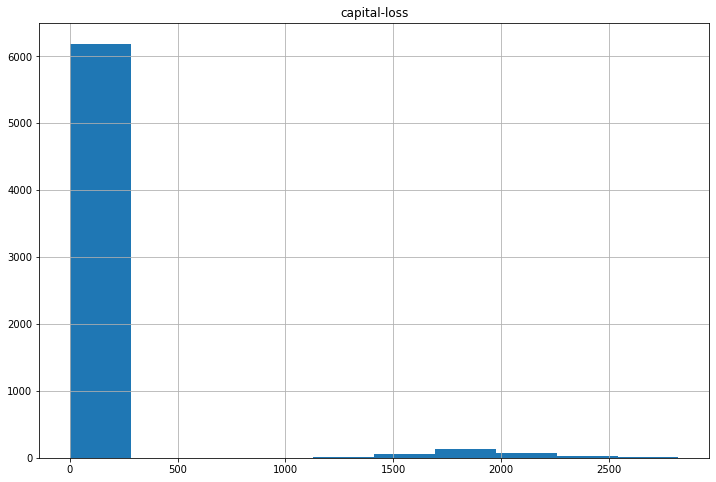

In [165]:
data.hist(column='capital-loss', figsize=(12,8));

In [166]:
variables = data.drop(['wage', 'education'], axis=1)


In [167]:
X = variables
y = data['wage']
ss = StandardScaler()
X = ss.fit_transform(X)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [189]:
pipe_params = [
    {
        'model__estimator': [LogisticRegression()],
        'model__estimator__penalty': ['l1', 'l2'],
        'model__estimator__class_weight' : ['balanced', None],
        'model__estimator__random_state' : [86]

    },
    {
        'model__estimator': [RandomForestClassifier()],
        'model__estimator__min_samples_split': [2, 3, 4, 5],
        'model__estimator__min_samples_leaf' : [5, 6, 7],
        'model__estimator__class_weight' : ['balanced', None],
        'model__estimator__random_state' : [86]

    },
     {
        'model__estimator': [DecisionTreeClassifier()],
        'model__estimator__min_samples_split': [2, 3, 4],
        'model__estimator__min_samples_leaf' : [1, 2, 3, 4],
        'model__estimator__max_features' : ['auto' , 'sqrt'],
    },
    {
        'model__estimator': [AdaBoostClassifier()],
        'model__estimator__n_estimators': [70, 80, 90],
        'model__estimator__learning_rate' : [1, 2],
        'model__estimator__algorithm' : ['SAMME', 'SAMME.R']
    },
     {
        'model__estimator': [KNeighborsClassifier()],
        'model__estimator__p': [1, 2],
        'model__estimator__leaf_size' : [30, 20, 10],
    },
     {
        'model__estimator': [BaggingClassifier()],
        'model__estimator__n_estimators': [50, 100, 200, 300],
        'model__estimator__bootstrap' : [True, False]
     },
     {
        'model__estimator': [SVC()],
        'model__estimator__degree' : [2, 3, 4],
        'model__estimator__C' : [1, 10, 20, 100],
        'model__estimator__class_weight' : ['balanced', None],
        'model__estimator__random_state' : [86]
     },
         {
        'model__estimator': [GaussianNB()]
     },
]

# Defining a function to do our model analysis. This function takes in X, y, and any pipe parameters
def model_analysis(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=86)
    pipe = Pipeline([
            ('model', ClfSwitcher())])

    gs = GridSearchCV(pipe, pipe_params, cv=3, verbose=3, n_jobs=3)
    gs.fit(X_train, y_train)

    print(f' Best Parameters: {gs.best_params_}')
    print('')
    print(f' Cross Validation Accuracy Score: {gs.best_score_}')
    print(f' Training Data Accuracy Score: {gs.score(X_train, y_train)}')
    print(f' Testing Data Accuracy Score: {gs.score(X_test, y_test)}')

In [190]:
model_analysis(X, y)

Fitting 3 folds for each of 103 candidates, totalling 309 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    3.9s
[Parallel(n_jobs=3)]: Done 309 out of 309 | elapsed:  1.9min finished


 Best Parameters: {'model__estimator': AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=90, random_state=None), 'model__estimator__algorithm': 'SAMME.R', 'model__estimator__learning_rate': 1, 'model__estimator__n_estimators': 90}

 Cross Validation Accuracy Score: 0.8538634966181594
 Training Data Accuracy Score: 0.8690305390448863
 Testing Data Accuracy Score: 0.851259987707437


In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=86)
ada = AdaBoostClassifier(n_estimators=80, learning_rate=1, random_state=86)
ada.fit(X_train, y_train)
ada_preds = ada.predict(X_train)


# Running cross value scores
cvs = cross_val_score(ada, X_train, y_train, cv=5).mean()
print(ada.score(X_test, y_test))


0.8500307314074985


In [171]:
y_test = y_test.reset_index()
y_test


,index,wage
0,3941,1
1,2110,0
2,6028,1
3,6327,0
4,5418,0
5,4252,0
6,13,1
7,930,0
8,5497,1
9,625,0


In [172]:
results = pd.DataFrame(ada.predict(X_test), columns=['predicted'])

# Create column for observed values.
y_test = y_test.reset_index()
results['actual'] = y_test['wage']
results['index1'] = y_test['index']
results.set_index('index1', inplace=True)

In [173]:
results

,predicted,actual
index1,,
3941,1,1
2110,0,0
6028,1,1
6327,0,0
5418,0,0
4252,0,0
13,0,1
930,0,0
5497,1,1


In [174]:
row_ids = results[results['predicted'] != results['actual']].index

In [176]:
preds = ada.predict(X_test)
print(confusion_matrix(y_test, # True values.
                 preds))  # Predicted values.
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

[[1137   98]
 [ 146  246]]


In [177]:
pred_proba = [i[1] for i in ada.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

In [178]:
var = .50
Laura = pred_df[(pred_df['pred_probs'] >= var) & (pred_df['true_values'] == 0)].shape[0]
Mikhail = pred_df[(pred_df['pred_probs'] < var) & (pred_df['true_values'] == 1)].shape[0]
Laura + Mikhail

244

In [179]:
roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])

0.917140378418574

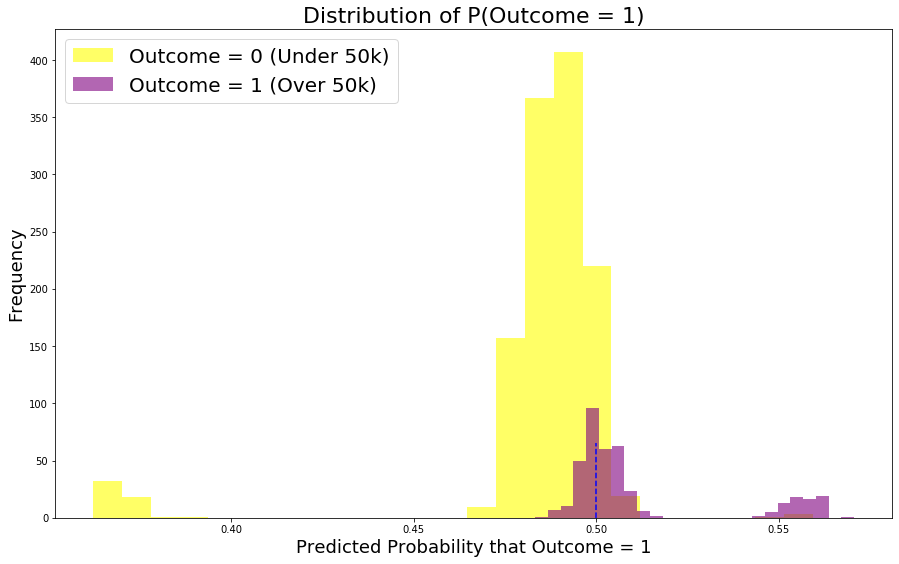

In [180]:
# Create figure to display the predicted probabilities for posts that were classified at California vs Not California.
#
plt.figure(figsize = (15,9))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='yellow',
         alpha = 0.6,
         label='Outcome = 0 (Under 50k)')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='purple',
         alpha = 0.6,
         label='Outcome = 1 (Over 50k)')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)
plt.vlines(x=0.5,
           ymin = 0,
           ymax = 65,
           color='blue',
           linestyle = '--')

# Create legend.
plt.legend(fontsize=20);

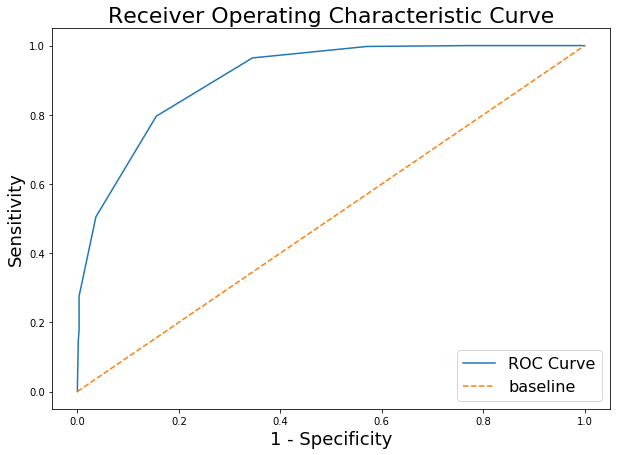

In [181]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);